In [123]:
import torch
import numpy as np

import ast
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
# import sys
# sys.version

In [125]:
import model
import train

In [126]:
import ast

In [127]:
def fails(func):
    try:
        func()
        return False
    except:
        return True

In [128]:
data = train.read_all_anytask()

In [129]:
for handle, result_for_handle in data.items():
    current = {}
    for problem, solution in result_for_handle.items():
#         if problem in common_problems:
            if not fails(lambda: ast.parse(solution)):
                current[problem] = solution
            else:
                print("Failed")
    
    data[handle] = current

Failed
Failed
Failed
Failed
Failed
Failed


In [130]:
def filter_people(df, people):
    result = {}
    for handle, result_for_handle in df.items():
        if handle in people:
            result[handle] = result_for_handle
    
    return result

In [131]:
def filter_ast_size(df, mn=0, mx=500):
    result = {}
    for handle, result_for_handle in df.items():
        current_result = {}
        for problem, submission in result_for_handle.items():
            try:
                parsed = ast.parse(submission)
                length = len(list(ast.walk(parsed)))
                print(length)
                if length >= mn and length <= mx:
                    current_result[problem] = submission
            except:
                pass
            
        result[handle] = current_result
    
    return result

In [132]:
# data = filter_ast_size(data, mn=50, mx=4000)

In [133]:
print(sorted(data.keys()))

['Dragunov_Nikita', 'Dzhenakov_Dmitriy', 'Filimonov_Vladislav', 'Fominskaya_Galina', 'Iavorskaia_Maria', 'Medvedev_Alex', 'Medvedev_Dmitry', 'Poletaev_Vsevolod', 'Ponomareva_Lubov', 'Rudnev_Viktor', 'Sagaydak_Oleg', 'Shamshiev_Mamat', 'Shatalov_Nikolay', 'Shestakova_Anna', 'Skachkov_Nikolay', 'Solotky_Michael', 'Somov_Ivan', 'Tsypin_Artem', 'Zakharenko_Vadim']


In [136]:
batch_sampler = train.StratifiedBatcherPreprocessed(data, 64, 0.8)
# batch_sampler = train.NameBatcher(data, 64, train_problems, test_problems)

In [137]:
batch_sampler.classes

['Dragunov_Nikita',
 'Dzhenakov_Dmitriy',
 'Filimonov_Vladislav',
 'Fominskaya_Galina',
 'Iavorskaia_Maria',
 'Medvedev_Alex',
 'Medvedev_Dmitry',
 'Poletaev_Vsevolod',
 'Ponomareva_Lubov',
 'Rudnev_Viktor',
 'Sagaydak_Oleg',
 'Shamshiev_Mamat',
 'Shatalov_Nikolay',
 'Shestakova_Anna',
 'Skachkov_Nikolay',
 'Solotky_Michael',
 'Somov_Ivan',
 'Tsypin_Artem',
 'Zakharenko_Vadim']

In [138]:
batch_sampler.get_n_classes()

19

In [139]:
np.unique(batch_sampler.y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 array([19, 15, 20, 21, 20, 20, 22, 17, 13, 23, 20, 19,  8, 20, 19, 25, 16,
        19, 11]))

In [140]:
np.unique(batch_sampler.y_test, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 array([5, 4, 6, 6, 6, 5, 6, 5, 4, 6, 6, 5, 3, 5, 5, 7, 4, 5, 3]))

In [153]:
cls = model.Model(batch_sampler.get_n_classes(), embedding_dims=100)

In [154]:
# trainer = train.Trainer(cls, torch.nn.CrossEntropyLoss(), torch.optim.SGD(cls.parameters(), lr=0.01, momentum=0.9))
trainer = train.Trainer(cls, torch.nn.CrossEntropyLoss(), torch.optim.Adam(cls.parameters()))

In [155]:
%ls

debug-anytask.ipynb                       many_classes_23_simple_model/
debug-anytask-sanity-check.ipynb          model.py
debug.ipynb                               __pycache__/
debug_not_using_trained_embeddings.ipynb  testing_the_embeddings.ipynb*
debug_using_trained_embeddings.ipynb      train.py
load_data.ipynb


In [156]:
dummy_cls = model.Model(batch_sampler.get_n_classes(), embedding_dims=100)
# dummy_cls.load_state_dict(torch.load("many_classes_23_simple_model/model_state.tc"))

In [157]:
# cls.ast_encoder.load_state_dict(dummy_cls.ast_encoder.state_dict())

In [158]:
torch.set_num_threads(1)

In [159]:
# cls.preprocessed = False

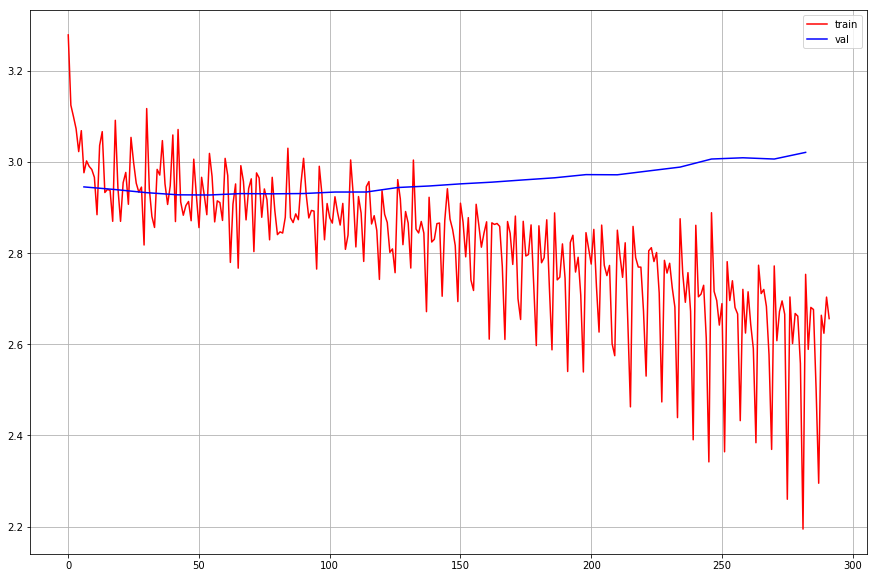

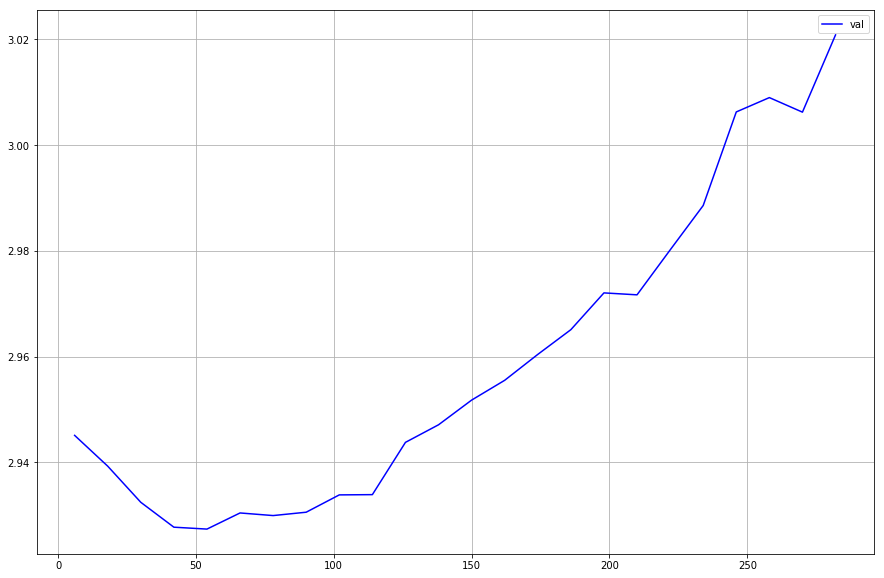

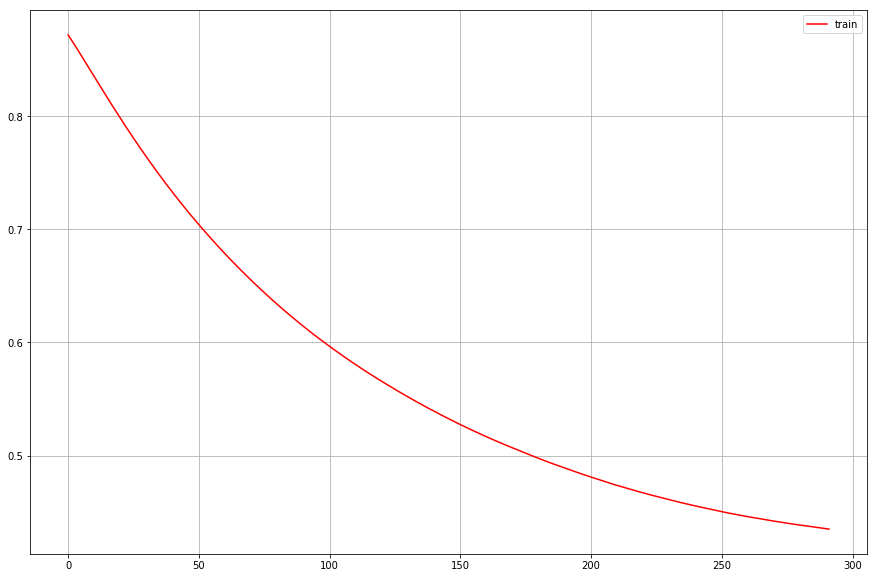

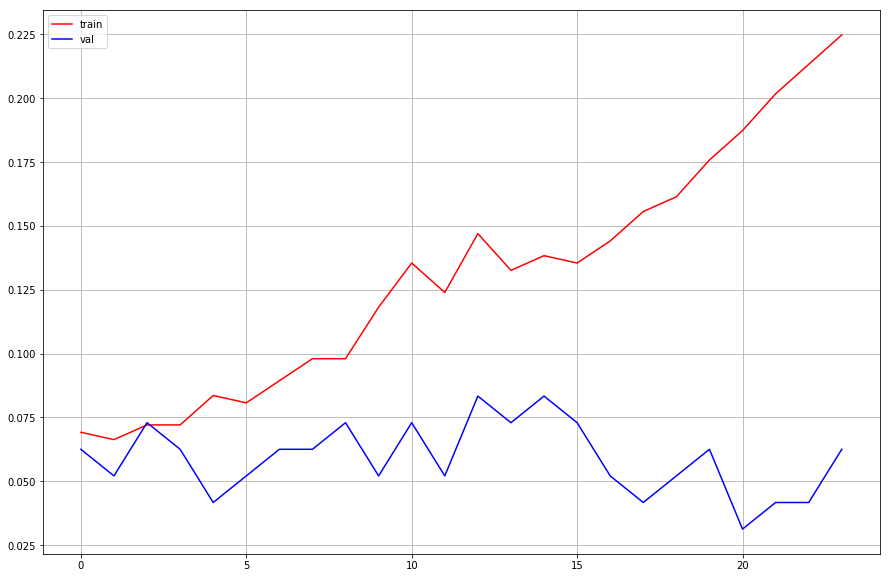

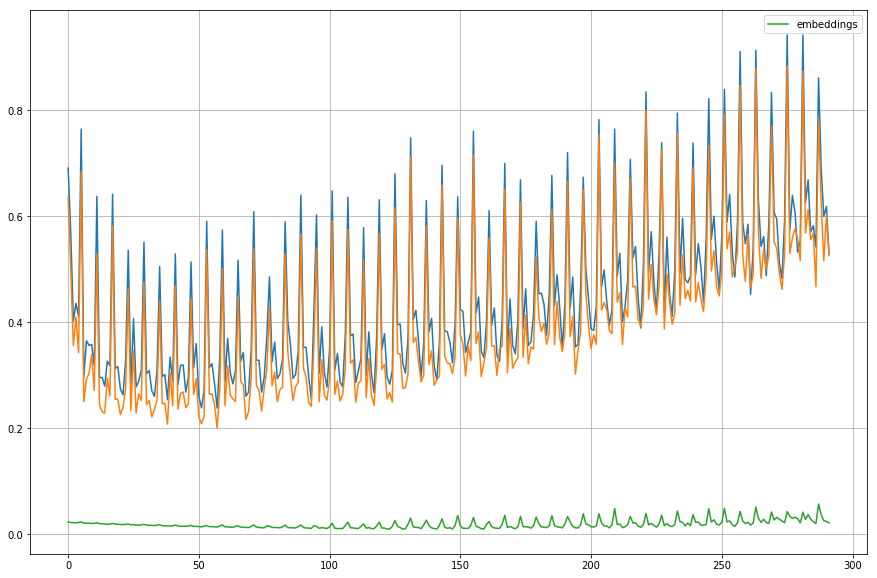

KeyboardInterrupt: 

In [160]:
trainer.train(batch_sampler, {"n_epochs":800})

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
def build_confusion_matrix(predicted_probs, true):
    n_labels = predicted_probs.shape[1]
#     assert true_y.shape == predicted_probs.shape
    result = np.zeros(shape=(n_labels, n_labels))
    
    pred = predicted_probs.argmax(axis=1)
#     true = true_y.argmax(axis=1)
    
    for pred_cls in range(n_labels):
        for true_cls in range(n_labels):
            result[true_cls, pred_cls] = np.count_nonzero(true[pred == pred_cls] == true_cls)
    norm = result.sum(axis=1)
    norm = np.maximum(norm, 1)
#     result /= norm[:, None]
    return result

def plot_confusion_matrix(confusion_matrix):
    fig = plt.figure( figsize=(20, 20))
    plt.xlabel("True classes")
    plt.ylabel("Predicted classes")
#     sns.heatmap(confusion_matrix, annot=True, vmin=0.0, vmax=1.0, cmap="YlGnBu")
    sns.heatmap(confusion_matrix, annot=True, vmin=0.0, cmap="YlGnBu")

In [93]:
import gc
gc.collect()

0

In [94]:
cls.eval()
x, y = batch_sampler.x_train, batch_sampler.y_train
pred = torch.nn.functional.softmax(cls.forward(x), dim=1)

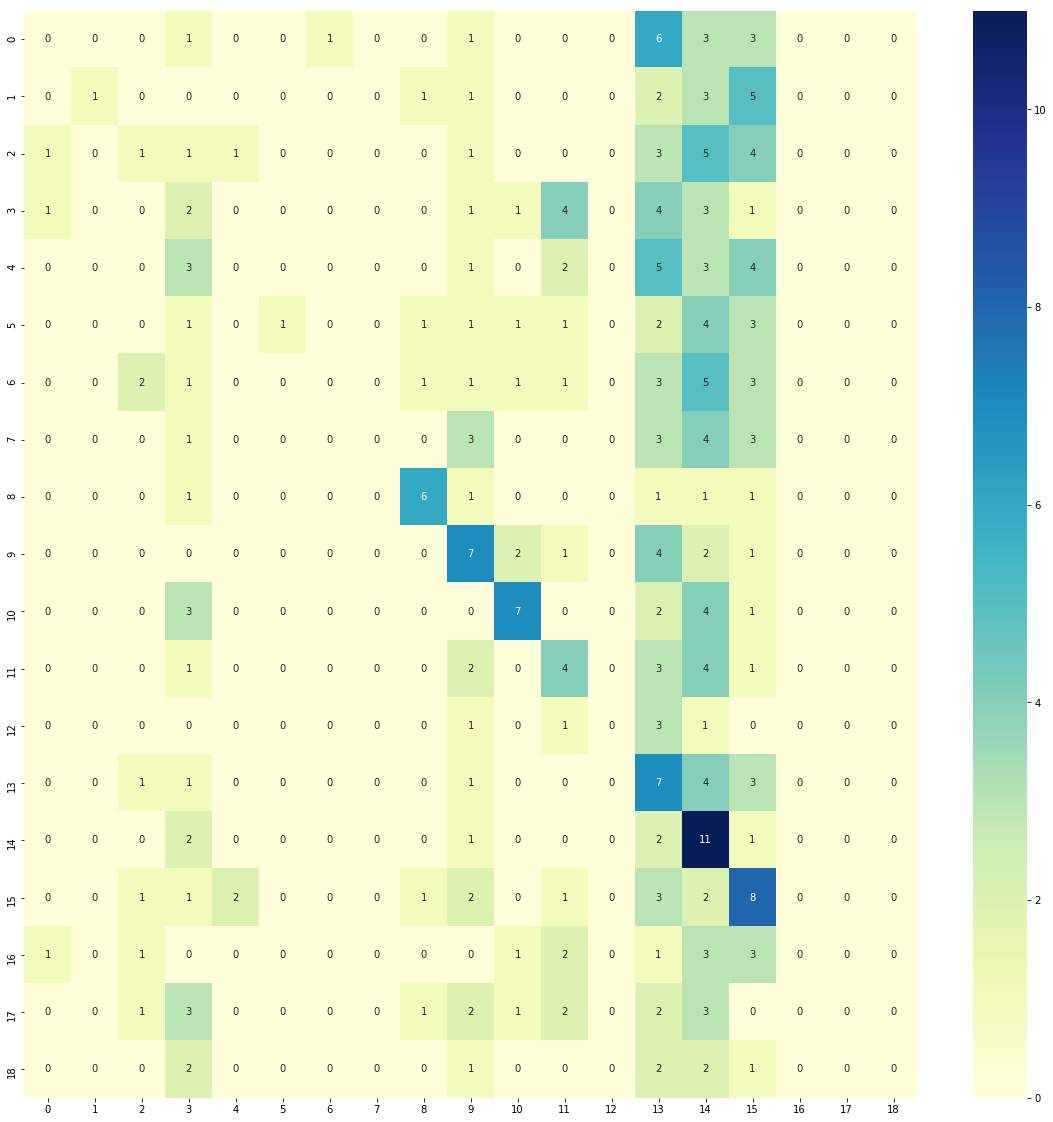

In [95]:
plot_confusion_matrix(build_confusion_matrix(pred.detach().numpy(), y.reshape(-1, 1)))

In [96]:
#cls.eval()
x, y = batch_sampler.x_test, batch_sampler.y_test
pred = torch.nn.functional.softmax(cls.forward(x), dim=1)

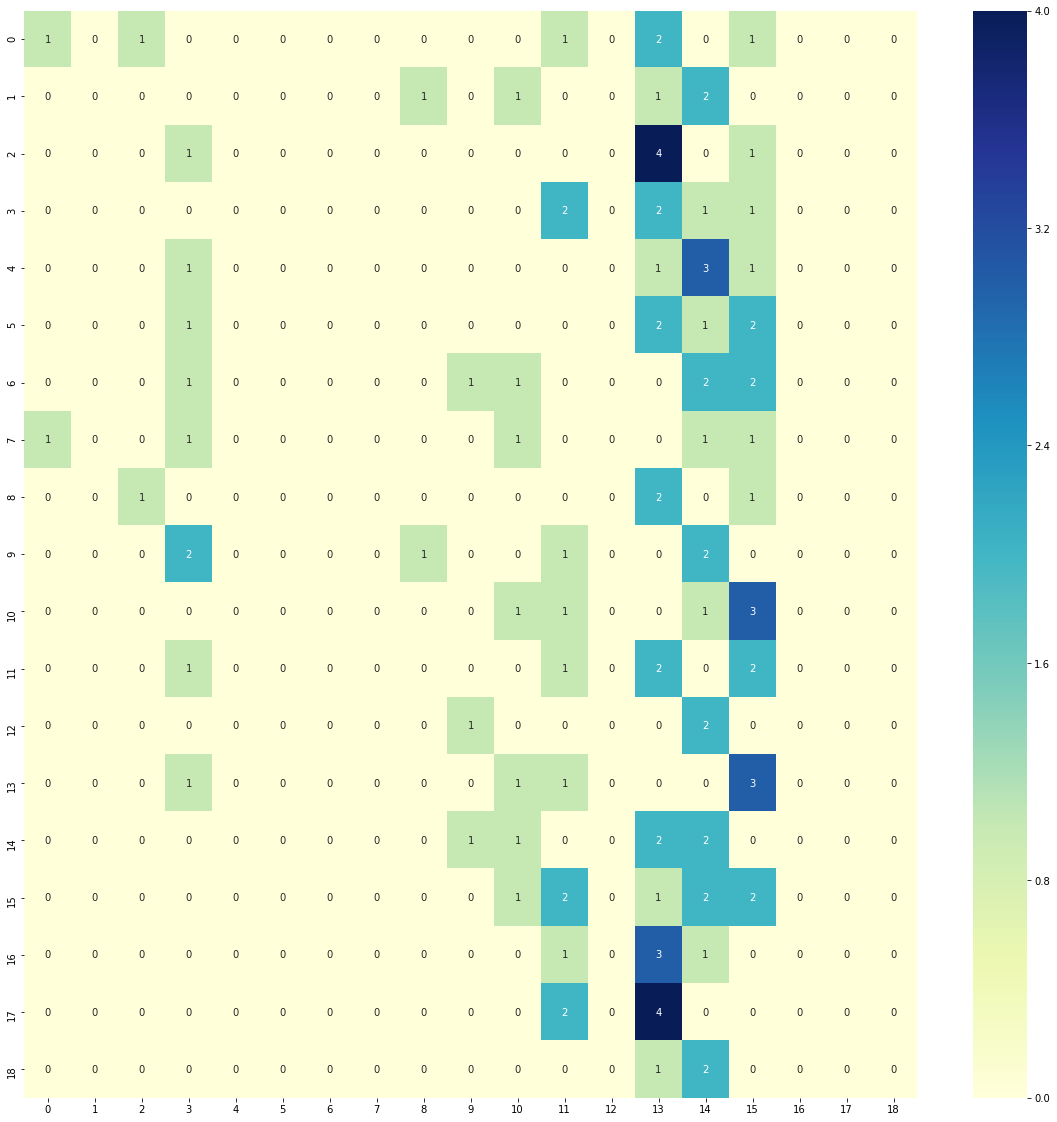

In [97]:
plot_confusion_matrix(build_confusion_matrix(pred.detach().numpy(), y.reshape(-1, 1)))

In [107]:
from sklearn.decomposition import PCA
import matplotlib.cm as cm
n_classes = batch_sampler.get_n_classes()
# colors = {0:'r', 1:'g', 2:'b', 3:'c', 4:'y
colors = {i:c for i, c in enumerate(cm.rainbow(np.linspace(0, 1, n_classes)))}
pca = PCA(n_components=2)
x_transformed = cls.transform_batch(batch_sampler.x_train)
x_test_transformed = cls.transform_batch(batch_sampler.x_test)
pca.fit(x_transformed.detach())
def plot_pca(x, y, alpha=1.0):
    plt.figure(figsize=(20, 20))
    plt.scatter(x[:, 0], x[:, 1], color=list(map(colors.get, y)), alpha=alpha)
    plt.show()

<Figure size 1440x1440 with 0 Axes>

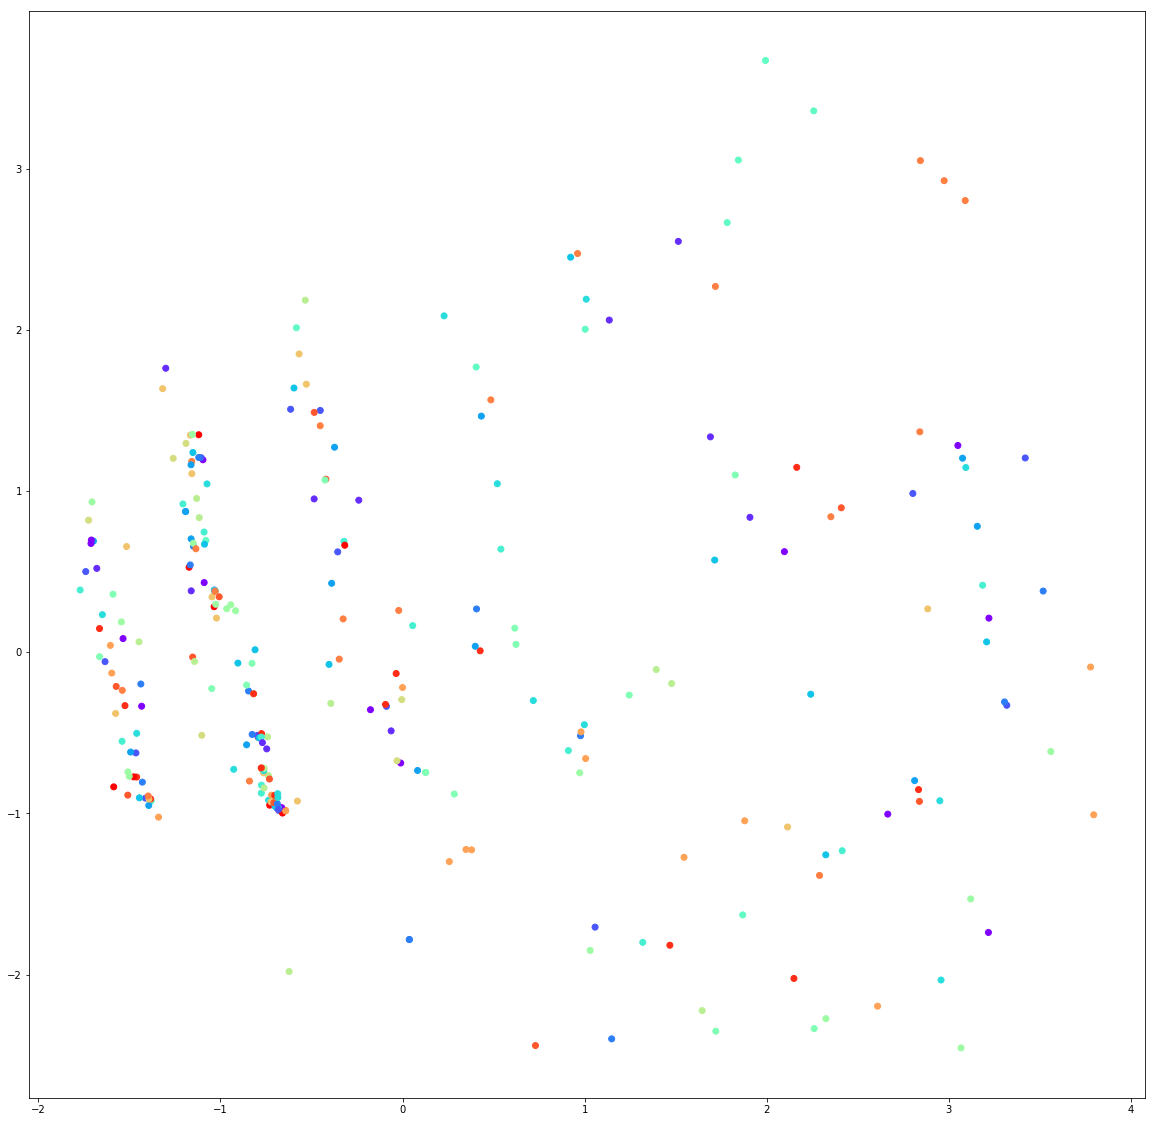

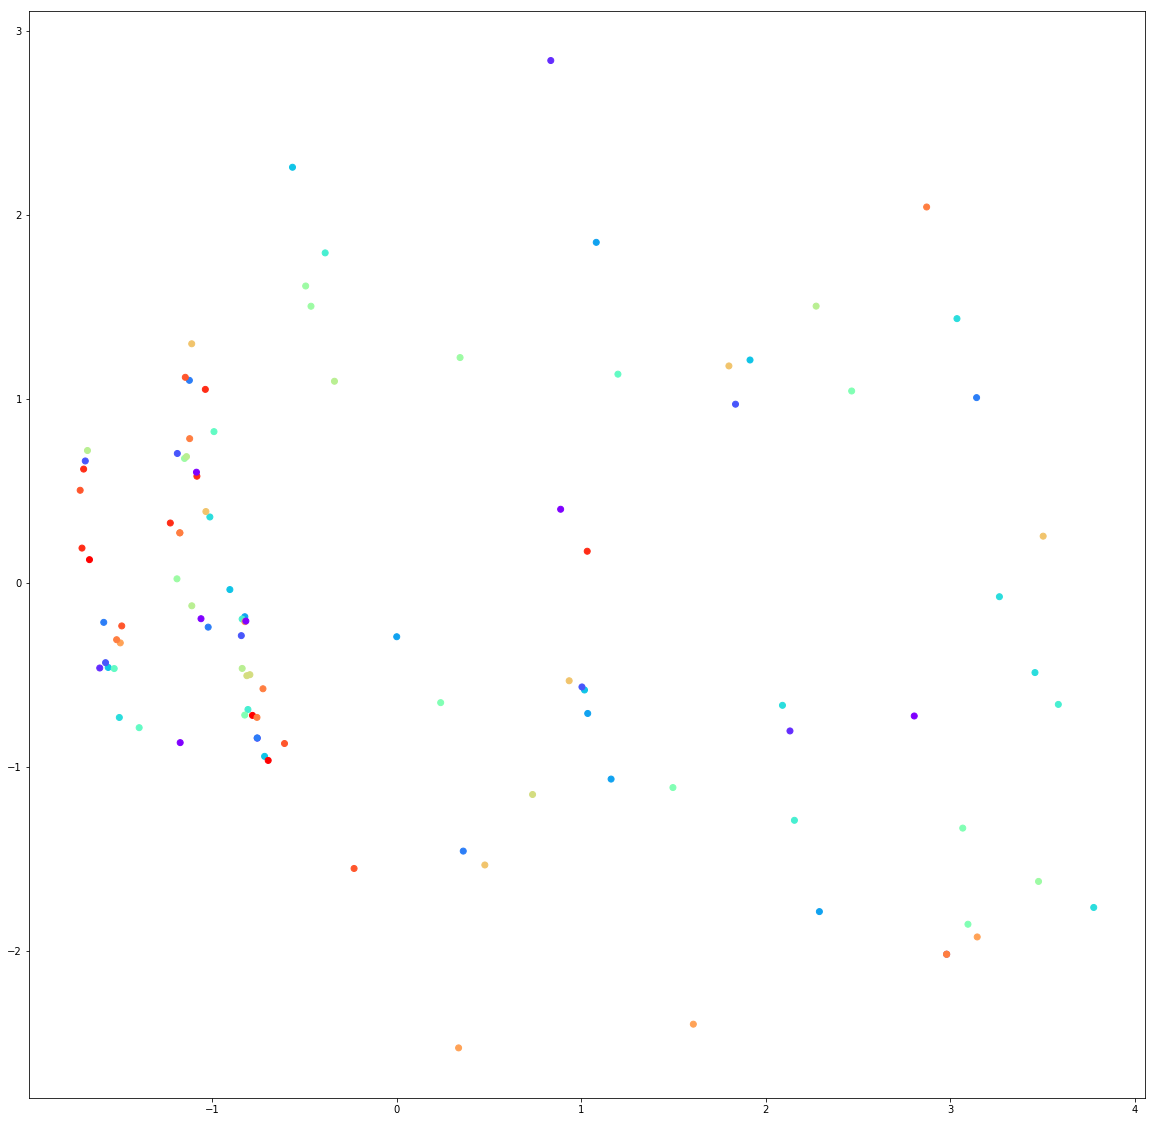

In [108]:
plt.figure(figsize=(20, 20))
plot_pca(pca.transform(x_transformed.detach()), batch_sampler.y_train, alpha=1.0)
plot_pca(pca.transform(x_test_transformed.detach()), batch_sampler.y_test, alpha=1.0)
# plt.show()